In [253]:
import random
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import signal

In [2]:
df = pd.read_csv("../m4_data/Monthly-train.csv")
print(df.shape)

(48000, 2795)


In [233]:
f_ranges = 10**np.linspace(-4,0,41)
f_ranges

array([1.00000000e-04, 1.25892541e-04, 1.58489319e-04, 1.99526231e-04,
       2.51188643e-04, 3.16227766e-04, 3.98107171e-04, 5.01187234e-04,
       6.30957344e-04, 7.94328235e-04, 1.00000000e-03, 1.25892541e-03,
       1.58489319e-03, 1.99526231e-03, 2.51188643e-03, 3.16227766e-03,
       3.98107171e-03, 5.01187234e-03, 6.30957344e-03, 7.94328235e-03,
       1.00000000e-02, 1.25892541e-02, 1.58489319e-02, 1.99526231e-02,
       2.51188643e-02, 3.16227766e-02, 3.98107171e-02, 5.01187234e-02,
       6.30957344e-02, 7.94328235e-02, 1.00000000e-01, 1.25892541e-01,
       1.58489319e-01, 1.99526231e-01, 2.51188643e-01, 3.16227766e-01,
       3.98107171e-01, 5.01187234e-01, 6.30957344e-01, 7.94328235e-01,
       1.00000000e+00])

In [228]:
?sns.*vertical*

sns.lineplot

n: 330
L: 164
[2, 328, 1, 329]
top n idx: [2, 328, 1, 329]
freq beginning [0.         0.0030303  0.00606061 0.00909091 0.01212121 0.01515152
 0.01818182]
top n freq: [0.00606061 0.99393939 0.0030303  0.9969697 ]
n: 330
L: 164
[2, 328, 1, 329, 0]


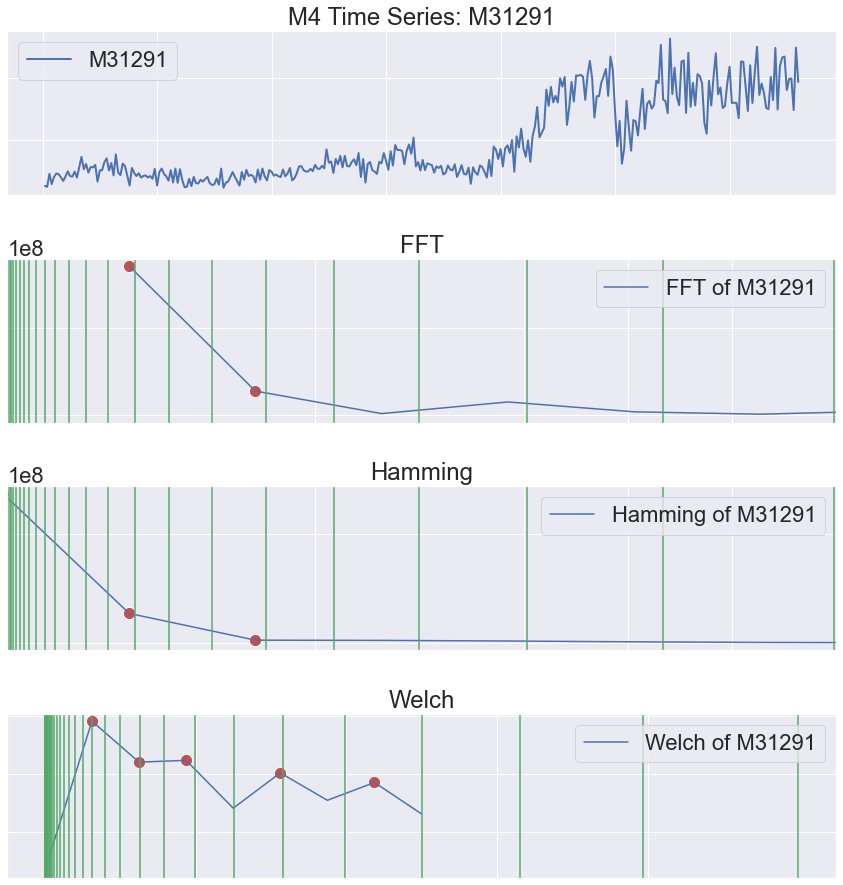

In [252]:
#sample_ts = df['V1'].sample(1).values[0]
f = np.array(df[df['V1']==sample_ts].iloc[:,1:].squeeze().dropna())
n = f.size
x = np.linspace(1,n,n)


        

# FFT
fhat = np.fft.fft(f)
PSD = np.real(fhat * np.conj(fhat) / n)
freq = np.arange(n)/f.size
L = np.arange(1,np.floor(n/2),dtype='int')
print(f"n: {n}\nL: {L[-1]}")
top_n = 5
n_lgst_idx = get_n_largest(PSD, top_n)[:-1]
#n_lgst_idx = n_lgst_idx +[27,28, 19]
print(n_lgst_idx)

print(f"top n idx: {n_lgst_idx}")
print(f"freq beginning {freq[:7]}")
print(f"top n freq: {freq[n_lgst_idx]}")
# Viz
sns.set(font_scale=2)
fig, axs = plt.subplots(4, 1,figsize=(13,13))
plt.tight_layout()
sns.lineplot(x=x, y=f, label=sample_ts, ax=axs.flatten()[0], lw=2)
axs.flatten()[0].set_title("M4 Time Series: {}".format(sample_ts))
sns.lineplot(x=freq[L], y=PSD[L], ax=axs.flatten()[1],
            label="FFT of {}".format(sample_ts))
axs.flatten()[1].set_title("FFT")

sns.scatterplot(x=freq[n_lgst_idx], y=PSD[n_lgst_idx],
                lw=2, s=150, color='r', ax=axs.flatten()[1])
axs.flatten()[1].set_xlim([10**(-4),0.02])
plt.setp(axs.flatten()[0].get_xticklabels(), visible=False);
plt.setp(axs.flatten()[0].get_yticklabels(), visible=False);
plt.setp(axs.flatten()[1].get_xticklabels(), visible=False);
plt.setp(axs.flatten()[1].get_yticklabels(), visible=False);

    


# Hamming
window = np.hamming(f.size)
fhat = np.fft.fft(f*window)
PSD = np.real(fhat * np.conj(fhat) / n)
freq = np.arange(n)/f.size
L = np.arange(1,np.floor(n/2),dtype='int')
print(f"n: {n}\nL: {L[-1]}")
top_n = 5
n_lgst_idx = get_n_largest(PSD, top_n)
#n_lgst_idx = n_lgst_idx +[27,28, 19]
print(n_lgst_idx)

sns.lineplot(x=freq,y=PSD, ax=axs.flatten()[2],
            label="Hamming of {}".format(sample_ts))
axs.flatten()[2].set_title("Hamming")

sns.scatterplot(x=freq[n_lgst_idx], y=PSD[n_lgst_idx],
                lw=2, s=150, color='r', ax=axs.flatten()[2])
axs.flatten()[2].set_xlim([10**(-4),0.02])

# Welch
seg_length = np.floor(1/20*n)
if seg_length == 0:
    seg_length=10
welch_freqs, PSD_welch = signal.welch(f, nperseg=seg_length,
                                      window='hamming')
n_lgst_idx = get_n_largest(PSD_welch, top_n)
sns.lineplot(x=welch_freqs, y=PSD_welch, ax=axs.flatten()[3],
            label="Welch of {}".format(sample_ts))
sns.scatterplot(x=welch_freqs[n_lgst_idx], y=PSD_welch[n_lgst_idx],
                lw=2, s=150, color='r', ax=axs.flatten()[3])
axs.flatten()[3].set_title("Welch")


plt.setp(axs.flatten()[2].get_xticklabels(), visible=False);
plt.setp(axs.flatten()[2].get_yticklabels(), visible=False);
plt.setp(axs.flatten()[3].get_xticklabels(), visible=False);
plt.setp(axs.flatten()[3].get_yticklabels(), visible=False);

# add horizontal range lines
for i in range(1,4):
    for x_val in f_ranges:
        axs.flatten()[i].axvline(x_val, color='g')
        


plt.savefig("../img/freq_range_example.png")

In [200]:
def get_n_largest(fhat: np.array, N: int) -> List[int]:
    """ return n largest coordinates """
    return sorted(range(len(fhat)), key= lambda x: fhat[x])[-N:]

M33149, M32328, M41478

In [192]:
get_n_largest(PSD_welch, 5)

[5, 4, 1, 3, 2]

In [193]:
PSD_welch

array([ 13527.25858251, 159960.22574221, 484793.19496549, 234683.98148   ,
       148031.02614567,  62162.86338214])

In [114]:
np.real(fhat)

array([ 2.67003848e+05, -5.48904693e+03,  8.96703017e+03, -8.55753207e+03,
        6.08204312e+03, -4.95529038e+02, -4.73820039e+03,  1.89772379e+02,
       -7.42576038e+02, -5.53218476e+03,  5.29626863e+03,  6.72694390e+03,
        3.21435521e+03,  1.43970943e+03,  1.39640082e+03, -3.80027770e+02,
       -4.70001006e+03, -2.38917700e+03, -4.18488012e+03, -1.61087848e+04,
        7.60676896e+03,  1.17592809e+04,  6.34588734e+03,  3.95768193e+03,
        5.91693803e+03,  2.24639429e+03,  3.83773754e+03,  3.94028887e+03,
        8.91830921e+03,  1.68496790e+04, -4.03076660e+03,  1.72671498e+03,
       -1.75574303e+03,  4.21702775e+03,  4.00940400e+03,  4.21702775e+03,
       -1.75574303e+03,  1.72671498e+03, -4.03076660e+03,  1.68496790e+04,
        8.91830921e+03,  3.94028887e+03,  3.83773754e+03,  2.24639429e+03,
        5.91693803e+03,  3.95768193e+03,  6.34588734e+03,  1.17592809e+04,
        7.60676896e+03, -1.61087848e+04, -4.18488012e+03, -2.38917700e+03,
       -4.70001006e+03, -

In [128]:
np.real(fhat)[19:30]

array([-16108.78484342,   7606.76896262,  11759.28088708,   6345.88734464,
         3957.68193301,   5916.93802844,   2246.39428711,   3837.73754288,
         3940.28887326,   8918.30920716,  16849.67899096])

In [116]:
np.where(np.isclose(np.real(fhat),16849.67899096029))

(array([29, 39]),)

In [258]:
random.choices(range(12),k=5)

[5, 9, 0, 7, 10]